<h1><center>K - Means Clustering</center></h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
iris_dataset = pd.read_csv('../../Data/Iris.csv')

In [3]:
iris_dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_dataset['Species'] = iris_dataset['Species'].astype('category')
iris_dataset['Species'] = iris_dataset['Species'].cat.codes

In [5]:
iris_X = iris_dataset.iloc[:, 1:]
iris_y = iris_dataset['Species']

In [6]:
# By default train_test_split does STRATIFIED split based on label (y-value).
from sklearn.model_selection import train_test_split
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris_X, iris_y, test_size=0.4)

#### "How to choose K ?"
  * One way to determine the number of clusters is to look at how the total of "within cluster sum of squares (WCSS)" behaves when the number of cluster changes. When you plot the number of clusters and the total WCSS (elbow-curve), the optimal number of clusters is when the total WCSS drops radically. We can access this value using "sklearn.cluster.KMeans.inertia_" attribute.

In [7]:
wcss = [] # Within Cluster Sum of Squares
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k, init='k-means++', random_state = 42)
    kmeans.fit(iris_X_train)
    preds = kmeans.predict(iris_X_train)
    
    wcss.append(kmeans.inertia_)
    silhou_score = silhouette_score(iris_X_train, preds)
    silhouette_scores.append(silhou_score)
    
    print("For n_clusters = {}, silhouette score is {})".format(k, silhou_score))

For n_clusters = 2, silhouette score is 0.7080081003860919)
For n_clusters = 3, silhouette score is 0.5948643021753844)
For n_clusters = 4, silhouette score is 0.537313192376282)
For n_clusters = 5, silhouette score is 0.53852890776772)
For n_clusters = 6, silhouette score is 0.3890353353799186)
For n_clusters = 7, silhouette score is 0.4041655011920375)
For n_clusters = 8, silhouette score is 0.3856050647014969)
For n_clusters = 9, silhouette score is 0.3734029945413556)


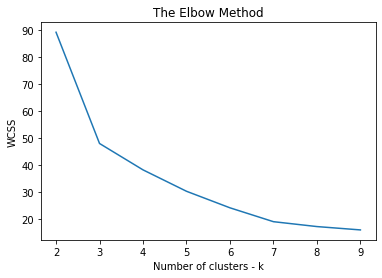

In [8]:
plt.plot(range(2, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters - k')
plt.ylabel('WCSS')
plt.show()

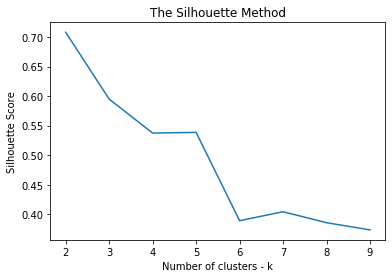

In [9]:
plt.plot(range(2, 10), silhouette_scores)
plt.title('The Silhouette Method')
plt.xlabel('Number of clusters - k')
plt.ylabel('Silhouette Score')
plt.show()

In [10]:
best_kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
X_clusters = best_kmeans.fit_predict(iris_X_train)

In [11]:
X_clusters.shape

(90,)

In [12]:
X_clusters[:100]

array([1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 2, 1, 2, 0, 2, 1, 2, 0, 1, 1, 2,
       2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 1, 0, 0, 2, 0, 2, 2,
       1, 0, 1, 0, 2, 0, 1, 0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 1, 0, 2, 2, 1, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 2, 1, 1, 1,
       2, 2])

In [13]:
X_clusters = X_clusters.reshape(-1,1)

### Cluster visulalization

In [14]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components = 2) 
components = pca1.fit_transform(iris_X_train)

In [15]:
X_viz = np.hstack((components, X_clusters))

In [16]:
df_X_viz = pd.DataFrame(X_viz, columns=['pc1', 'pc2', 'cluster'])

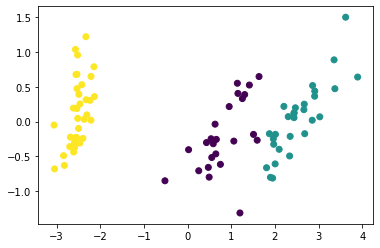

In [17]:
g = plt.scatter(x="pc1", y="pc2", c="cluster", data=df_X_viz)